<a href="https://colab.research.google.com/github/MachukaJoy/autoencoders_clothes_design/blob/main/autoencoders_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy
import torch
from torchvision import transforms, datasets

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Check if GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 8.95MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.5MB/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
# Define various architectures
class ShallowAE(nn.Module):
    def __init__(self):
        super(ShallowAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
class DeepAE(nn.Module):
    def __init__(self):
        super(DeepAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
class CustomAE(nn.Module):
    def __init__(self):
        super(CustomAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Train Function
def train_autoencoder(model, trainloader, epochs=20, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        running_loss = 0
        for images, _ in trainloader:
            images = images.view(images.size(0), -1)  # Flatten images
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    return losses

In [ ]:
# Plot Loss
def plot_loss(losses, title):
    plt.plot(losses)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()


In [ ]:
# Initialize and train models
shallow_ae = ShallowAE()
deep_ae = DeepAE()
custom_ae = CustomAE()

Epoch 1, Loss: 0.6117
Epoch 2, Loss: 0.5898
Epoch 3, Loss: 0.5857
Epoch 4, Loss: 0.5836
Epoch 5, Loss: 0.5825


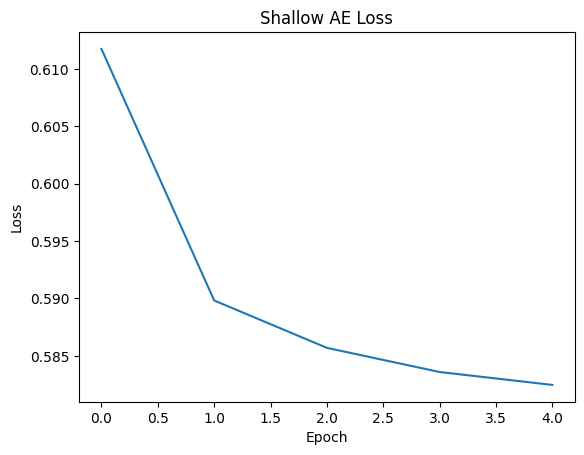

Epoch 1, Loss: 0.6192
Epoch 2, Loss: 0.5961
Epoch 3, Loss: 0.5920
Epoch 4, Loss: 0.5896
Epoch 5, Loss: 0.5882


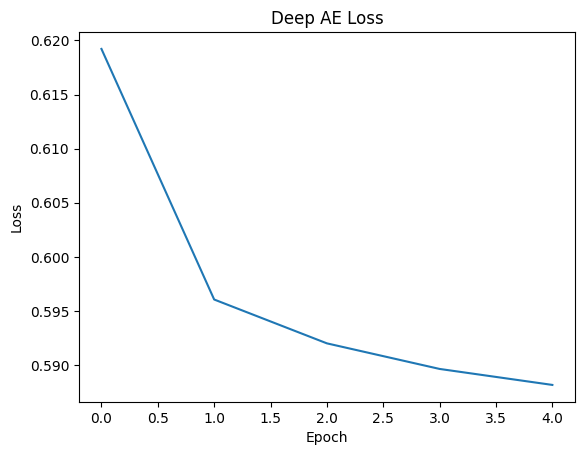

Epoch 1, Loss: 0.6221
Epoch 2, Loss: 0.5997
Epoch 3, Loss: 0.5965
Epoch 4, Loss: 0.5947
Epoch 5, Loss: 0.5936


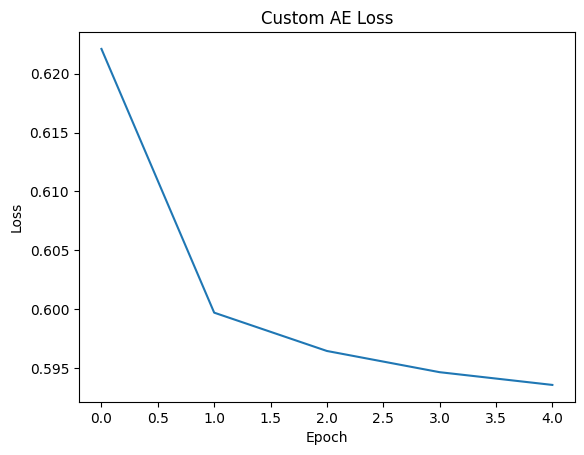

In [ ]:
# training process
shallow_loss = train_autoencoder(shallow_ae, trainloader, epochs=5)
plot_loss(shallow_loss, "Shallow AE Loss")

deep_loss = train_autoencoder(deep_ae, trainloader, epochs=5)
plot_loss(deep_loss, "Deep AE Loss")

custom_loss = train_autoencoder(custom_ae, trainloader, epochs=5)
plot_loss(custom_loss, "Custom AE Loss")

The shallow Autoencoder appears to have a lower loss on the fifth epoc hence performing slightly better than the rest.
We will therefore train it with more epochs to see it perform better.

In [ ]:
shallow_loss = train_autoencoder(shallow_ae, trainloader, epochs=10)
plot_loss(shallow_loss, "Shallow AE Loss")

Epoch 1, Loss: 0.5820
Epoch 2, Loss: 0.5816
Epoch 3, Loss: 0.5813
Epoch 4, Loss: 0.5812
Epoch 5, Loss: 0.5810
Epoch 6, Loss: 0.5809
Epoch 7, Loss: 0.5808
Epoch 8, Loss: 0.5807
Epoch 9, Loss: 0.5807
Epoch 10, Loss: 0.5806
Epoch 11, Loss: 0.5806
Epoch 12, Loss: 0.5805
Epoch 13, Loss: 0.5805
Epoch 14, Loss: 0.5805
Epoch 15, Loss: 0.5805
Epoch 16, Loss: 0.5804
Epoch 17, Loss: 0.5804
Epoch 18, Loss: 0.5804
Epoch 19, Loss: 0.5803
Epoch 20, Loss: 0.5804
Epoch 21, Loss: 0.5804
Epoch 22, Loss: 0.5803
Epoch 23, Loss: 0.5803
Epoch 24, Loss: 0.5803
Epoch 25, Loss: 0.5803
Epoch 26, Loss: 0.5803
Epoch 27, Loss: 0.5803
Epoch 28, Loss: 0.5803
Epoch 29, Loss: 0.5803
Epoch 30, Loss: 0.5802
Epoch 31, Loss: 0.5802
Epoch 32, Loss: 0.5802
Epoch 33, Loss: 0.5802
Epoch 34, Loss: 0.5802
Epoch 35, Loss: 0.5802
Epoch 36, Loss: 0.5802
Epoch 37, Loss: 0.5802
Epoch 38, Loss: 0.5802
Epoch 39, Loss: 0.5802
Epoch 40, Loss: 0.5802
Epoch 41, Loss: 0.5802
Epoch 42, Loss: 0.5802
Epoch 43, Loss: 0.5802
Epoch 44, Loss: 0.58

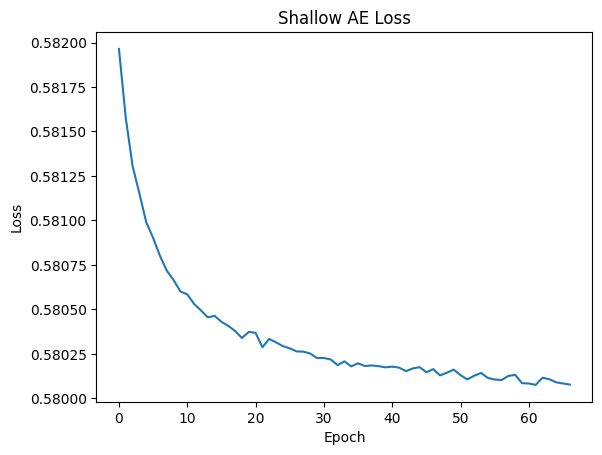

In [ ]:
# implement early stopping for the epochs
def train_autoencoder_early_stop(model, trainloader, patience=5, lr=0.001):
    """
    Train the AutoEncoder with early stopping.

    Args:
        model: The AutoEncoder model.
        trainloader: DataLoader for the training data.
        patience: Number of epochs to wait for improvement before stopping.
        lr: Learning rate for the optimizer.

    Returns:
        losses: List of losses for each epoch.
    """
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    best_loss = float('inf')  # Initialize with infinity
    epochs_no_improve = 0  # Counter for early stopping

    epoch = 0
    while epochs_no_improve < patience:
        model.train()
        running_loss = 0

        for images, _ in trainloader:
            images = images.view(images.size(0), -1)  # Flatten images
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        losses.append(avg_loss)

        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

        # Check for improvement
        if avg_loss < best_loss:
            best_loss = avg_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        epoch += 1

    print(f"Training stopped after {epoch} epochs with best loss: {best_loss:.4f}")
    return losses

# Train with early stopping
shallow_loss = train_autoencoder_early_stop(shallow_ae, trainloader, patience=5)
plot_loss(shallow_loss, "Shallow AE Loss")


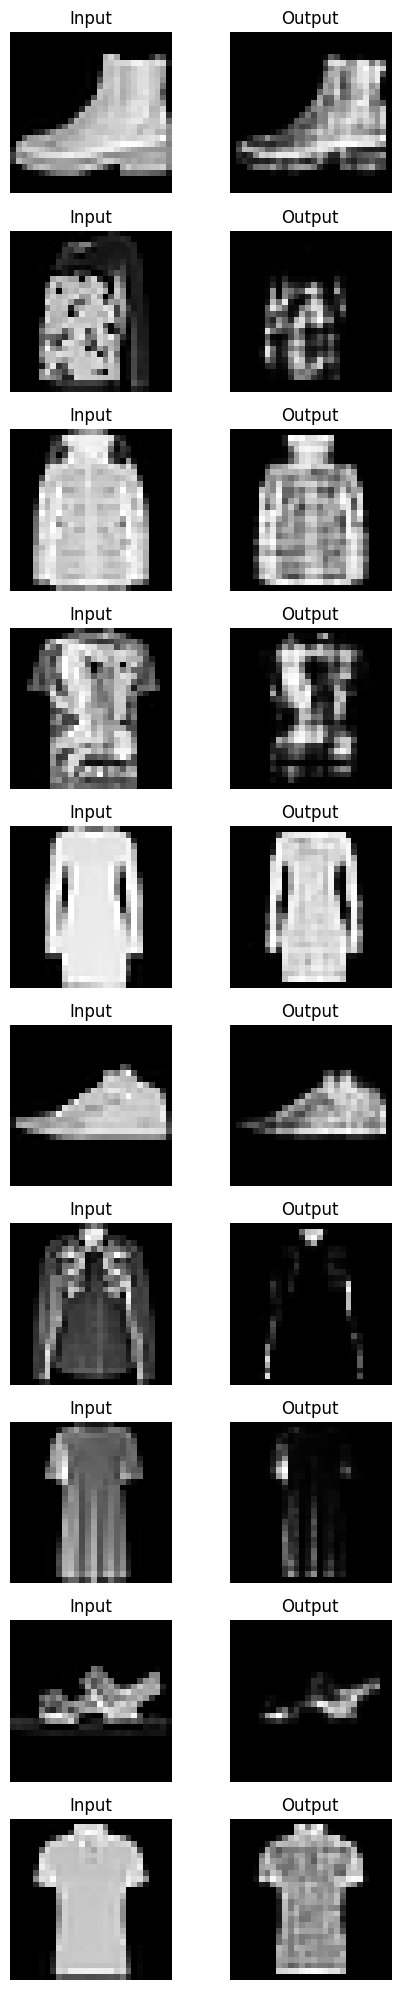

In [15]:
def visualize_reconstructions(model, testloader, n=10):
    model.eval()
    inputs, _ = next(iter(testloader))
    inputs = inputs.view(inputs.size(0), -1)
    outputs = model(inputs).view(-1, 1, 28, 28)

    inputs = inputs.view(-1, 1, 28, 28).detach().numpy()
    outputs = outputs.detach().numpy()

    fig, axes = plt.subplots(n, 2, figsize=(5, n * 2))
    for i in range(n):
        axes[i, 0].imshow(inputs[i].squeeze(), cmap='gray')
        axes[i, 0].set_title("Input")
        axes[i, 0].axis("off")

        axes[i, 1].imshow(outputs[i].squeeze(), cmap='gray')
        axes[i, 1].set_title("Output")
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Visualize reconstructions
visualize_reconstructions(shallow_ae, testloader)


The reconstruction is not as clear but it's within the same shape.